# Improved Flight Price Prediction 

# <i> ~Back End</i>

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Reading Processed dataset

In [2]:
# reading dataset and creating a dataframe

df = pd.read_excel('Final_Processed_dataset2.xlsx')
df.head()

,Unnamed: 0,Name,From,To,Time of Flight,Stops,Extra Services,Price,Day,Month,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_hour,Arrival_hour
0,0,3,0,5,170,4,8,3897,24,3,0,13,29,13,5,22,1
1,1,1,3,0,445,1,8,7662,1,5,2,25,1,3,5,5,13
2,2,4,2,1,1140,1,8,13882,9,6,3,32,4,5,5,9,4
3,3,3,3,0,325,0,8,6218,12,5,2,34,3,13,5,18,23
4,4,3,0,5,285,0,8,13302,1,3,0,34,8,13,5,16,21


In [3]:
# drop Unnamed: 0 column

df.rename({"Unnamed: 0":"False"}, axis=1, inplace=True)
df.drop(["False"], axis=1, inplace=True)

df.head()

,Name,From,To,Time of Flight,Stops,Extra Services,Price,Day,Month,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_hour,Arrival_hour
0,3,0,5,170,4,8,3897,24,3,0,13,29,13,5,22,1
1,1,3,0,445,1,8,7662,1,5,2,25,1,3,5,5,13
2,4,2,1,1140,1,8,13882,9,6,3,32,4,5,5,9,4
3,3,3,0,325,0,8,6218,12,5,2,34,3,13,5,18,23
4,3,0,5,285,0,8,13302,1,3,0,34,8,13,5,16,21


In [4]:
# features

df.columns

Index(['Name', 'From', 'To', 'Time of Flight', 'Stops', 'Extra Services',
       'Price', 'Day', 'Month', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5', 'Dep_hour', 'Arrival_hour'],
      dtype='object')

In [9]:
# writer = pd.ExcelWriter("C:\\Users\\Ashutosh Kumar Singh\\PythonTraining\\flight_price_OT\\Final_Processed_dataset2.xlsx")
# df.to_excel(writer,'Sheet1')
# writer.save()

In [5]:
# Dependent Variables

X = df[['Name', 'From', 'To', 'Time of Flight', 'Stops', 'Extra Services',
       'Day', 'Month', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5', 'Dep_hour', 'Arrival_hour']].values

In [6]:
# Independent Variable

Y = df['Price'].values

In [7]:
# scaling X in range of 0 to 1000

scaler = MinMaxScaler(feature_range=(0,1000))
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1000))

In [8]:
# transforming X

X=scaler.transform(X)

In [9]:
X[0]

array([ 272.72727273,    0.        , 1000.        ,   57.79334501,
       1000.        ,  888.88888889,  884.61538462,    0.        ,
          0.        ,  288.88888889, 1000.        , 1000.        ,
       1000.        ,  956.52173913,   43.47826087])

In [10]:
# Splitting 70% as Train Data & 30% as Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [11]:
xgb = xgboost.XGBRegressor(n_estimators=600, learning_rate=0.8, gamma=0.3, subsample=1,
                           colsample_bytree=0.8, max_depth=1000)

In [12]:
#Fitting the datset into the model

xgb.fit(X_train,Y_train)

[18:24:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
             importance_type='gain', learning_rate=0.8, max_delta_step=0,
             max_depth=1000, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Fitting model with 70 % data

In [13]:
# prediction by model

Y_predicted = xgb.predict(X_test)

In [14]:
# Actual vs Predicted Value

test_df = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
test_df.tail(20)

,Original,Predicted
3119,7480,7716.402344
3120,5264,5534.248047
3121,3100,3172.110840
3122,3873,3801.775879
3123,12373,12464.874023
3124,4282,4421.681152
3125,14571,13878.429688
3126,7308,7405.733398
3127,15078,13827.890625
3128,6991,7789.576660


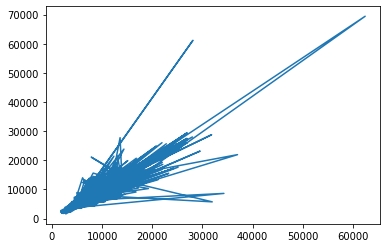

In [19]:
import matplotlib.pyplot as plt

plt.plot(Y_test, Y_predicted)

In [ ]:
plt.plot(Y_test, Y_predicted, ) 
    
plt.plot(x2, y2, label = "line 2") 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('Two lines on same graph!') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

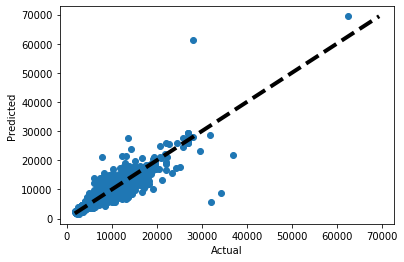

In [23]:

fig, ax = plt.subplots()
ax.scatter(Y_test, Y_predicted)
ax.plot([Y_test.min(), Y_predicted.max()], [Y_test.min(), Y_predicted.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [20]:
accuracy = xgb.score(X_test,Y_test)
print(accuracy*100)

86.95913651915305


In [68]:
# saving model trained with X_train, Y_train

joblib.dump(xgb, 'xgb1.pkl')

['xgb1.pkl']

In [69]:
model = joblib.load('xgb1.pkl')

[01:24:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [21]:
p = model.predict(X_test)

In [22]:
d = pd.DataFrame({'actual':Y_test, 'predicted':p})

In [23]:
d

,actual,predicted
0,7295,7295.169922
1,6601,6600.906738
2,8266,8265.654297
3,7832,7832.076660
4,10203,10202.974609
5,6741,6740.826660
6,12392,12295.456055
7,4148,4673.067871
8,3850,3850.133789
9,3543,3543.370361


In [77]:
# model.predict([[4,3,0,5,285,0,8,1,3,0,34,8,13,5,16,21]])

### Fitting model with 100 % data

In [78]:
xgb.fit(X,Y)

[01:31:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
             importance_type='gain', learning_rate=0.8, max_delta_step=0,
             max_depth=1000, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [79]:
Y_predicted = xgb.predict(X_test)

In [80]:
d = pd.DataFrame({'actual':Y_test, 'predicted':Y_predicted})
d

,actual,predicted
0,7295,7295.169922
1,6601,6600.906738
2,8266,8265.654297
3,7832,7832.076660
4,10203,10202.974609
5,6741,6740.826660
6,12392,12295.456055
7,4148,4673.067871
8,3850,3850.133789
9,3543,3543.370361


In [81]:
accuracy = xgb.score(X_test, Y_test)
accuracy * 100

99.39149633565746

In [82]:
joblib.dump(xgb, 'xgb2.pkl')

['xgb2.pkl']

In [25]:
model = joblib.load('xgb2.pkl')

model.predict([ 272.72727273,    0.        , 1000.        ,   57.79334501,
       1000.        ,  888.88888889,  884.61538462,    0.        ,
          0.        ,  288.88888889, 1000.        , 1000.        ,
       1000.        ,  956.52173913,   43.47826087])

[13:31:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([5192.4624], dtype=float32)

In [26]:
accuracy = model.score(X_test, Y_test)
accuracy * 100

99.39149633565746